# PREDICTOR - GASTO MEDIO
# 01

# Proposito:

En este notebook nos dedicaremos a la creación del predictor para gasto medio con características de nuestro cliente. 

In [1]:
%load_ext watermark
%watermark

Last updated: 2023-01-27T09:55:54.324890+00:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd
import numpy as np
import os
import re

# PREPARACION PREVIA

Primero necesitamos copiar todos nuestros archivos en una carpeta donde podramos manipularlos para así conservar los archivos originales

In [3]:
from distutils.dir_util import copy_tree

# Método que limpia la carpeta de datos volatiles ya que es 
# una carpeta activa en todos los programas que hemos generado.
def limpiaCarpetaVolatil(rutaCopia):
    print("Limpiando Carpeta Volatil...")
    for f in os.listdir(rutaCopia):
        os.remove(os.path.join(rutaCopia, f))
        
#Metodo que copia recursivamente
def copia(dir_origen,dir_destino):
    print("Copiando...")
    copy_tree(dir_origen, dir_destino)
    print("Copiado")
    print(os.listdir(dir_destino))
  


In [4]:
rutaBase= "../PredictorGastoTuristico/DatosPredictor/01"
rutaCopia= "../PredictorGastoTuristico/DatosVolatiles/"

limpiaCarpetaVolatil(rutaCopia)
copia(rutaBase,rutaCopia)

Limpiando Carpeta Volatil...
Copiando...
Copiado
['gasto_medio_canarias.csv']


## Primero cargamos los archivos para tratarlos y finalmente unirlos:

In [5]:
ruta = rutaCopia
list_csv_names = os.listdir(ruta)
index = 0
for archivo in list_csv_names:
    print(str(index) + " " + archivo)
    index = index + 1

0 gasto_medio_canarias.csv


In [6]:
gasto_medio = pd.read_csv(ruta+list_csv_names[0],keep_default_na=False, na_values=[""])

In [7]:
gasto_medio.head()

,fecha,pais,isla,total gasto por turista,gasto por turista alojamiento,gasto por turista transporte nacional / internacional,gasto por turista otros,Turistas Hombres De 15 a 24,Turistas Mujeres De 15 a 24,Turistas Hombres De 25 a 44,...,Turistas Hombres TOTAL EDADES,Turistas Mujeres TOTAL EDADES,Total Turistas por motivo: Ocio o vacaciones,Total Turistas por motivo: Otros motivos,Total Turistas por motivo: Personal,Total Turistas por motivo: TOTAL MOTIVOS,Total Turistas por motivo: Trabajo o negocios,Total Turistas: No contrataron un paquete turístico,Total Turistas: Sí contrataron un paquete turístico,Total Turistas: Total
0,2010Q1,Alemania,CANARIAS,1121.10,469.68,338.11,313.30,16718.0,15374.0,93932.0,...,300809.0,320111.0,604627.0,3633.0,8526.0,620920.0,4134.0,154831.0,466089.0,620920.0
1,2010Q1,Alemania,CANARIAS,1147.19,472.84,341.47,332.88,16718.0,15374.0,93932.0,...,300809.0,320111.0,604627.0,3633.0,8526.0,620920.0,4134.0,154831.0,466089.0,620920.0
2,2010Q1,España,CANARIAS,769.14,293.16,193.28,282.70,10179.0,8403.0,55682.0,...,180231.0,154998.0,270814.0,3700.0,7096.0,335230.0,53619.0,201097.0,134132.0,335230.0
3,2010Q1,España,CANARIAS,666.96,238.65,166.80,261.51,10179.0,8403.0,55682.0,...,180231.0,154998.0,270814.0,3700.0,7096.0,335230.0,53619.0,201097.0,134132.0,335230.0
4,2010Q1,Holanda,CANARIAS,1072.71,436.86,320.57,315.28,2861.0,2899.0,13466.0,...,46656.0,47784.0,90723.0,2245.0,511.0,94439.0,961.0,21215.0,73224.0,94439.0


In [8]:
gasto_medio.shape

(350, 27)

# PREDICTOR

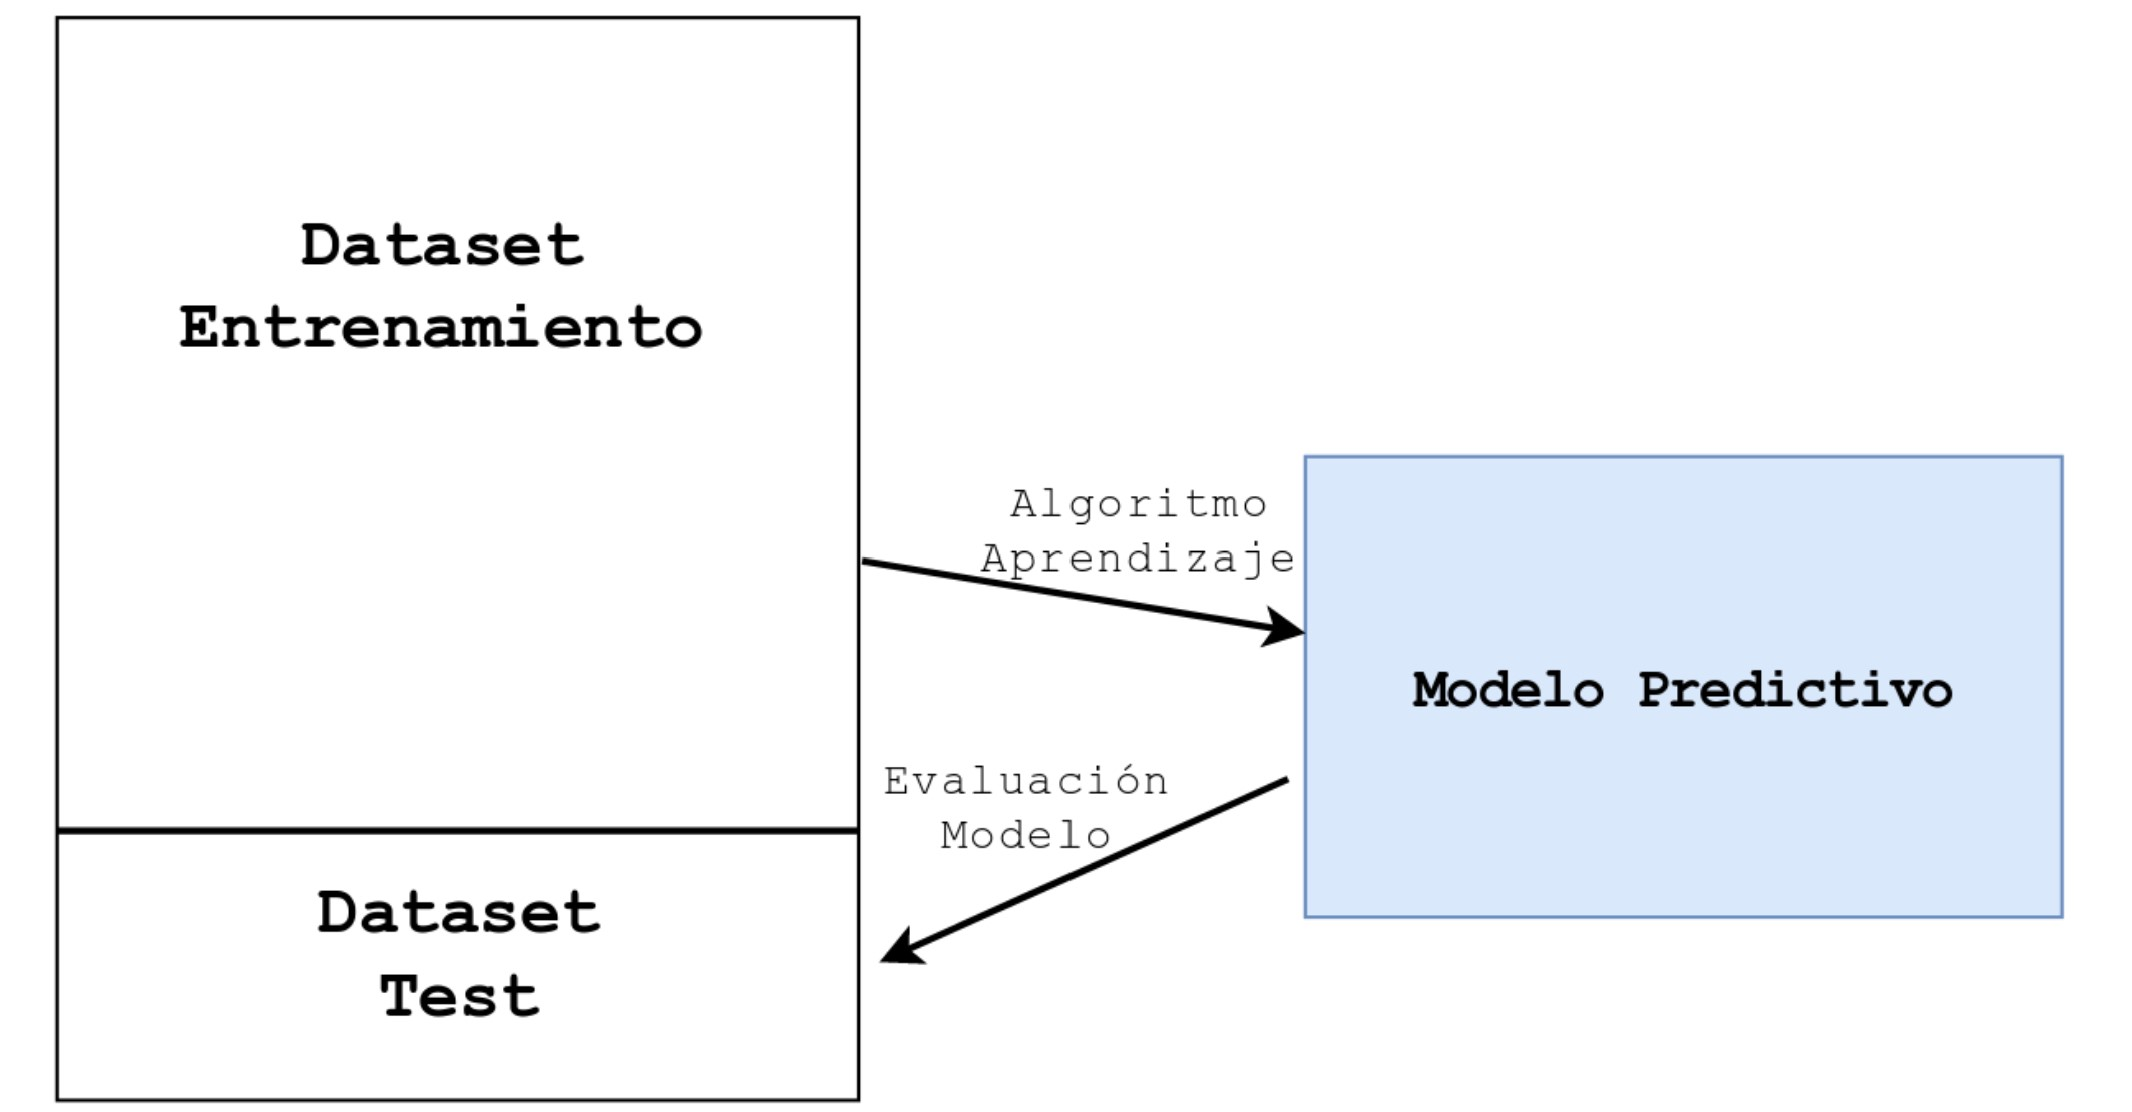

In [9]:
from IPython.display import Image

Image("../PredictorGastoTuristico/OtrosRecursos/Imagenes/img01.jpg")

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
def rmse(objetivo, estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo, estimaciones)
                  )

def adjusted_r2(objetivo, estimaciones, n, k):
    r2 = metrics.r2_score(objetivo, estimaciones)
    return 1 - (1-r2)*(n-1) / (n - k - 1)

def evaluar_modelo(objetivo, estimaciones, n, k):
    return {
        "rmse": rmse(objetivo, estimaciones),
        "mae": metrics.mean_absolute_error(objetivo, estimaciones),
        "adjusted_r2": adjusted_r2(objetivo, estimaciones, n, k)
           }

In [12]:
gasto_medio.columns

Index(['fecha', 'pais', 'isla', 'total gasto por turista',
       'gasto por turista alojamiento',
       'gasto por turista transporte nacional / internacional',
       'gasto por turista  otros', 'Turistas Hombres De 15 a 24',
       'Turistas Mujeres De 15 a 24', 'Turistas Hombres De 25 a 44',
       'Turistas Mujeres De 25 a 44', 'Turistas Hombres De 45 a 64',
       'Turistas Mujeres De 45 a 64', 'Turistas Hombres Mayor de 64',
       'Turistas Mujeres Mayor de 64', 'Turistas Hombres Menor de 15',
       'Turistas Mujeres Menor de 15', 'Turistas Hombres TOTAL EDADES',
       'Turistas Mujeres TOTAL EDADES',
       'Total Turistas por motivo: Ocio o vacaciones',
       'Total Turistas por motivo: Otros motivos',
       'Total Turistas por motivo: Personal',
       'Total Turistas por motivo: TOTAL MOTIVOS',
       'Total Turistas por motivo: Trabajo o negocios',
       'Total Turistas: No contrataron un paquete turístico',
       'Total Turistas: Sí contrataron un paquete turístico

quite islas, paises y fechas ya que me da problemas en al regresion esto lo hago solo por probar a ver como es


In [13]:
nombres_variables_independientes = ['Turistas Hombres De 15 a 24',
       'Turistas Mujeres De 15 a 24', 'Turistas Hombres De 25 a 44',
       'Turistas Mujeres De 25 a 44', 'Turistas Hombres De 45 a 64',
       'Turistas Mujeres De 45 a 64', 'Turistas Hombres Mayor de 64',
       'Turistas Mujeres Mayor de 64', 'Turistas Hombres Menor de 15',
       'Turistas Mujeres Menor de 15', 'Turistas Hombres TOTAL EDADES',
       'Turistas Mujeres TOTAL EDADES',
       'Total Turistas por motivo: Ocio o vacaciones',
       'Total Turistas por motivo: Otros motivos',
       'Total Turistas por motivo: Personal',
       'Total Turistas por motivo: TOTAL MOTIVOS',
       'Total Turistas por motivo: Trabajo o negocios',
       'Total Turistas: No contrataron un paquete turístico',
       'Total Turistas: Sí contrataron un paquete turístico',
       'Total Turistas: Total']

In [14]:
gasto_medio[nombres_variables_independientes]

,Turistas Hombres De 15 a 24,Turistas Mujeres De 15 a 24,Turistas Hombres De 25 a 44,Turistas Mujeres De 25 a 44,Turistas Hombres De 45 a 64,Turistas Mujeres De 45 a 64,Turistas Hombres Mayor de 64,Turistas Mujeres Mayor de 64,Turistas Hombres Menor de 15,Turistas Mujeres Menor de 15,Turistas Hombres TOTAL EDADES,Turistas Mujeres TOTAL EDADES,Total Turistas por motivo: Ocio o vacaciones,Total Turistas por motivo: Otros motivos,Total Turistas por motivo: Personal,Total Turistas por motivo: TOTAL MOTIVOS,Total Turistas por motivo: Trabajo o negocios,Total Turistas: No contrataron un paquete turístico,Total Turistas: Sí contrataron un paquete turístico,Total Turistas: Total
0,16718.0,15374.0,93932.0,100462.0,113098.0,121978.0,36697.0,40075.0,40365.0,42222.0,300809.0,320111.0,604627.0,3633.0,8526.0,620920.0,4134.0,154831.0,466089.0,620920.0
1,16718.0,15374.0,93932.0,100462.0,113098.0,121978.0,36697.0,40075.0,40365.0,42222.0,300809.0,320111.0,604627.0,3633.0,8526.0,620920.0,4134.0,154831.0,466089.0,620920.0
2,10179.0,8403.0,55682.0,48843.0,67299.0,60046.0,22696.0,18803.0,24376.0,18905.0,180231.0,154998.0,270814.0,3700.0,7096.0,335230.0,53619.0,201097.0,134132.0,335230.0
3,10179.0,8403.0,55682.0,48843.0,67299.0,60046.0,22696.0,18803.0,24376.0,18905.0,180231.0,154998.0,270814.0,3700.0,7096.0,335230.0,53619.0,201097.0,134132.0,335230.0
4,2861.0,2899.0,13466.0,15240.0,17878.0,17614.0,5842.0,5783.0,6610.0,6249.0,46656.0,47784.0,90723.0,2245.0,511.0,94439.0,961.0,21215.0,73224.0,94439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,14060.0,15458.0,81840.0,85275.0,97702.0,104686.0,29645.0,33925.0,36488.0,38143.0,259733.0,277487.0,527480.0,3717.0,2684.0,537220.0,3339.0,81875.0,455346.0,537220.0
346,14060.0,15458.0,81840.0,85275.0,97702.0,104686.0,29645.0,33925.0,36488.0,38143.0,259733.0,277487.0,527480.0,3717.0,2684.0,537220.0,3339.0,81875.0,455346.0,537220.0
347,18299.0,16411.0,91431.0,83872.0,85030.0,77251.0,19997.0,20304.0,28618.0,27633.0,243374.0,225472.0,463409.0,1241.0,2142.0,468846.0,2057.0,76036.0,392810.0,468846.0
348,5077.0,4507.0,15914.0,15163.0,9724.0,9466.0,594.0,890.0,6491.0,6376.0,37800.0,36404.0,73069.0,170.0,378.0,74204.0,589.0,23803.0,50400.0,74204.0


In [15]:
nombre_variables_objetivas = ['total gasto por turista',
       'gasto por turista alojamiento',
       'gasto por turista transporte nacional / internacional',
       'gasto por turista  otros']

# PROBAMOS HACIENDO UN MODELO SENCILLO

In [16]:
modelo_ols = LinearRegression()

modelo_ols.fit(X=gasto_medio[nombres_variables_independientes], y=gasto_medio[nombre_variables_objetivas[0]])

modelo_ols_preds = modelo_ols.predict(gasto_medio[nombres_variables_independientes])

In [17]:
RESULTADOS = {}

In [18]:
N = gasto_medio[nombres_variables_independientes].shape[0]

RESULTADOS["ols"] = evaluar_modelo(
    gasto_medio[nombre_variables_objetivas[0]],
    modelo_ols_preds,
    N,
    len(modelo_ols.coef_)
)

RESULTADOS

{'ols': {'rmse': 109.73721444858712,
  'mae': 84.70074088279948,
  'adjusted_r2': 0.5792083056003767}}

# AQUÍ DIVIDIMOS EL DATASET EN TRAIN Y TEST

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split?

In [21]:
gasto_medio[nombres_variables_independientes].shape

(350, 20)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
     gasto_medio[nombres_variables_independientes], gasto_medio[nombre_variables_objetivas[0]],
     test_size=0.33, random_state=13
)

In [23]:
print(X_train.shape, y_train.shape)

(234, 20) (234,)


In [24]:
print(X_test.shape, y_test.shape)

(116, 20) (116,)


In [25]:
modelo_ols = LinearRegression()
modelo_ols.fit(X=X_train, y=y_train)
modelo_ols_train_preds = modelo_ols.predict(X_train)

In [26]:
RESULTADOS["ols_train"] = evaluar_modelo(
    y_train,
    modelo_ols_train_preds,
    X_train.shape[0],
    len(modelo_ols.coef_)
)

In [27]:
modelo_ols_test_preds = modelo_ols.predict(X_test)

RESULTADOS["ols_test"] = evaluar_modelo(
    y_test,
    modelo_ols_test_preds,
    X_test.shape[0],
    len(modelo_ols.coef_)
)

In [28]:
pd.DataFrame(RESULTADOS)

,ols,ols_train,ols_test
rmse,109.737214,111.418064,117.173336
mae,84.700741,86.361091,89.181922
adjusted_r2,0.579208,0.556259,0.431125


Vemos que al separar los datos de entrenamiento y los de test se obtiene un resultado peor al evaluar los datos de test.

Podríamos parar aquí y decir *"El error RMSE de mi modelo es 117.173336"*, y podríamos pensar que esta todo bien ya que no hemos entrenado el modelo en los datos que hemos usado para evaluarlo.

Pero hay un grave error. Y es que hemos usado un `random_state=13` para la función `train_test_split` que garantiza que la separación de entrenamiento y test sea siempre la misma. Podemos usar cualquier número para este argumento, si ponemos otro como `random_state=42` nos data un resultado diferente.

In [29]:
RESULTADOS = {}

X_train, X_test, y_train, y_test = train_test_split(
    #Es lo mismo que lo anteriro pero cambiando la semilla (random_state)
     gasto_medio[nombres_variables_independientes], gasto_medio[nombre_variables_objetivas[0]],
     test_size=0.33, random_state=42
)


modelo_ols = LinearRegression()
modelo_ols.fit(X=X_train, y=y_train)
modelo_ols_train_preds = modelo_ols.predict(X_train)
modelo_ols_test_preds = modelo_ols.predict(X_test)


RESULTADOS["ols_train"] = evaluar_modelo(
    y_train,
    modelo_ols_train_preds,
    X_train.shape[0],
    len(modelo_ols.coef_)
)

RESULTADOS["ols_test"] = evaluar_modelo(
    y_test,
    modelo_ols_test_preds,
    X_test.shape[0],
    len(modelo_ols.coef_)
)

pd.DataFrame(RESULTADOS)

,ols_train,ols_test
rmse,109.830262,115.056067
mae,84.952995,88.847163
adjusted_r2,0.534708,0.533093


Para ver la magnitud del error en el que estamos cayendo al hacer una sola separación entre test y entrenamiento, vamos a probar un monton de semillas y ver cual es el rango del error que se puede obtener 

In [30]:
model=LinearRegression()
results = []

def test_seed(seed):
    
    X_train, X_test, y_train, y_test = train_test_split(
     gasto_medio[nombres_variables_independientes], gasto_medio[nombre_variables_objetivas[0]],
     test_size=0.33, random_state=seed
    )
    test_preds = model.fit(X_train, y_train).predict(X_test)
    seed_rmse = rmse(y_test, test_preds)
    results.append([seed_rmse, seed])

In [31]:
for i in range(1000):
    test_seed(i)

In [32]:
results[:5]

[[112.5484484885666, 0],
 [129.89689764849854, 1],
 [116.98307997817808, 2],
 [109.59617357842214, 3],
 [121.39295888813406, 4]]

In [33]:
results_sorted = sorted(results, key=lambda x: x[0], reverse=False)

In [34]:
results_sorted[0]

[90.82502362587272, 24]

In [35]:
results_sorted[-1]

[149.66937646375817, 900]

# Validación Cruzada (Cross Validation)

Vemos que entre la semilla con menor error de test y la semilla con mayor error hay una diferencia casi del doble!

Una forma de evitar el cometer este error es mediante la **Validación cruzada**

![cross_val](https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score?

In [38]:
modelo_ols = LinearRegression()
X = gasto_medio[nombres_variables_independientes]
y = gasto_medio[nombre_variables_objetivas[0]]

resultados_validación_cruzada = cross_val_score(
    estimator=modelo_ols, 
    X=X,
    y=y,
    scoring="neg_mean_squared_error", 
    cv=10
)

In [39]:
resultados_validación_cruzada

array([-12616.9177294 , -20209.56363627,  -7774.42519286, -14374.01315129,
       -18260.78278016, -14926.11092577, -11872.54775758, -20160.59608957,
       -36005.08989601, -13032.00807344])

In [40]:
resultados_validación_cruzada.mean()

-16923.20552323703

In [41]:
def rmse_cross_val(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

In [42]:
resultados_cv = []
for i in range(10,100):
    cv_rmse = cross_val_score(
        estimator=modelo_ols, 
        X=X,
        y=y,
        scoring=rmse_cross_val, 
        cv=i
    ).mean()
    resultados_cv.append(cv_rmse)

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

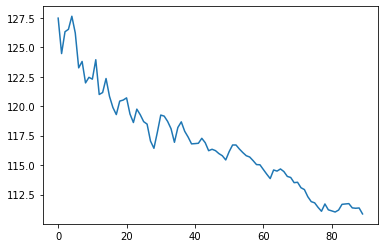

In [44]:
plt.plot(resultados_cv)

In [45]:
from sklearn.model_selection import cross_validate
scoring = {"mae": "neg_mean_absolute_error", "rmse": rmse_cross_val}
estimator = modelo_ols
scores = cross_validate(estimator, gasto_medio[nombres_variables_independientes],
                        gasto_medio[nombre_variables_objetivas[0]], scoring=scoring,
                         cv=100, return_train_score=True)

In [46]:
pd.DataFrame(scores).mean()

fit_time        0.007327
score_time      0.010685
test_mae      -94.280120
train_mae     -84.646913
test_rmse     110.624232
train_rmse    109.681900
dtype: float64